# Bank Failure Data Analysis

### Michael Hillin, Brendan

### Data: 

This dataset from the Federal Deposit Insurance Corporation (FDCI) contains data about bank failures in the United States from 2001 to the present.

### Questions:


What State had the most failed banks?
What Year had the most bank failures?
Which time period had the most bank failures?

In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import boto3
from io import StringIO

# Create a session and resource for S3
s3 = boto3.client('s3')

# Specify the S3 bucket and file
bucket_name = 'ia340-2024-121112'
file_key = 'banklist.csv'

# Read the CSV file from S3
response = s3.get_object(Bucket=bucket_name, Key=file_key)
data = response['Body'].read().decode('ISO-8859-1')  # Change to ISO-8859-1

# Load the data into a DataFrame
df = pd.read_csv(StringIO(data))

# Display the first few rows of the DataFrame
print(df.head())


                              Bank Name           City  State   Cert   \
0  Republic First Bank dba Republic Bank   Philadelphia     PA  27332   
1                          Citizens Bank       Sac City     IA   8758   
2               Heartland Tri-State Bank        Elkhart     KS  25851   
3                    First Republic Bank  San Francisco     CA  59017   
4                         Signature Bank       New York     NY  57053   

              Acquiring Institution  Closing Date    Fund  
0  Fulton Bank, National Association     26-Apr-24  10546  
1          Iowa Trust & Savings Bank      3-Nov-23  10545  
2             Dream First Bank, N.A.     28-Jul-23  10544  
3          JPMorgan Chase Bank, N.A.      1-May-23  10543  
4                Flagstar Bank, N.A.     12-Mar-23  10540  


In [3]:
df.isnull().sum()

Bank Name                 0
City                      0
State                     0
Cert                      0
Acquiring Institution     0
Closing Date              0
Fund                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               569 non-null    object
 1   City                    569 non-null    object
 2   State                   569 non-null    object
 3   Cert                    569 non-null    int64 
 4   Acquiring Institution   569 non-null    object
 5   Closing Date            569 non-null    object
 6   Fund                    569 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.2+ KB


In [5]:
df.describe()

,Cert,Fund
count,569.000000,569.000000
mean,31653.056239,10042.210896
std,16464.868900,1110.637083
min,91.000000,4645.000000
25%,20115.000000,10118.000000
50%,32102.000000,10260.000000
75%,35372.000000,10402.000000
max,59017.000000,10546.000000


In [6]:
# First, we'll rename the column to remove trailing spaces and then clean the data.
df.columns = df.columns.str.strip()

# Remove hashtags and extra spaces from the 'Closing Date' column
df['Closing Date'] = df['Closing Date'].str.replace('#', '').str.strip()

# Display the first few rows to confirm the changes
df[['Closing Date']].head()

,Closing Date
0,26-Apr-24
1,3-Nov-23
2,28-Jul-23
3,1-May-23
4,12-Mar-23


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              569 non-null    object
 1   City                   569 non-null    object
 2   State                  569 non-null    object
 3   Cert                   569 non-null    int64 
 4   Acquiring Institution  569 non-null    object
 5   Closing Date           569 non-null    object
 6   Fund                   569 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.2+ KB


In [8]:
pip install jupyter-ai~=1.0 

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 9

In [9]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [10]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [11]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [12]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [13]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [14]:
%%ai gpt4
explain the code in {In[2]}

The provided script is used to read a CSV file from an Amazon S3 bucket and load it into a pandas DataFrame.

1. `import warnings warnings.simplefilter('ignore')`: This code imports the warnings module and sets it to ignore all warning messages. This is often used to suppress unnecessary or unwanted warning messages that could clutter the console output.

2. `import pandas as pd`: This line imports the pandas library, a powerful data manipulation and analysis library, and assigns it to the alias pd.

3. `import boto3`: This line imports the boto3 library, the Amazon Web Services (AWS) SDK for Python, which allows Python developers to write software that makes use of services like Amazon S3, Amazon EC2, etc.

4. `from io import StringIO`: This line imports the StringIO function from the io module. StringIO is used to read and write strings as files.

5. `s3 = boto3.client('s3')`: This line creates a low-level client representing Amazon S3.

6. `bucket_name = 'ia340-2024-121112'` and `file_key = 'banklist.csv'`: These lines specify the name of the S3 bucket and the key of the file to be read.

7. `response = s3.get_object(Bucket=bucket_name, Key=file_key)`: This line retrieves the specified file from the S3 bucket.

8. `data = response['Body'].read().decode('ISO-8859-1')`: This line reads the data from the response and decodes it from 'ISO-8859-1' to a Python string.

9. `df = pd.read_csv(StringIO(data))`: This line reads the string data into a pandas DataFrame.

10. `print(df.head())`: This line prints the first 5 rows of the DataFrame to the console.

In [16]:
%%ai gpt4
Calculate which States had the most failed banks in {df} in {In[2]} 
and visualize this in a bar chart

The provided script reads a CSV file from an Amazon S3 bucket, which contains information about failed banks, and loads this data into a pandas DataFrame. 

To calculate which states had the most failed banks, you would group the DataFrame by the 'State' column and then count the occurrences. Here is how you would do this in Python:

```python
# Calculate the number of failed banks by state
failed_banks_by_state = df['State'].value_counts()
```

In this line of code, `df['State'].value_counts()` counts the number of occurrences of each unique value in the 'State' column and returns a Series sorted by value in descending order.

To visualize the number of failed banks by state in a bar chart, you can use the matplotlib library:

```python
import matplotlib.pyplot as plt

# Plot the data
failed_banks_by_state.plot(kind='bar', figsize=(14,7))
plt.title('Number of Failed Banks by State')
plt.xlabel('State')
plt.ylabel('Number of Failed Banks')
plt.show()
```

In this code, `failed_banks_by_state.plot(kind='bar', figsize=(14,7))` creates a bar plot of the Series. `plt.title`, `plt.xlabel`, and `plt.ylabel` are used to set the title of the plot and the labels of the x and y axes, respectively. `plt.show()` is then used to display the plot.

Note: This explanation does not contain any code execution or output. It is intended to explain how to perform these operations in Python. If you want to actually execute this code and see the output, you would need to do this in a Python environment.


In [21]:
failed_banks_by_state = df['State'].value_counts()
failed_banks_by_state

State
GA    93
FL    76
IL    69
CA    43
MN    23
WA    19
MO    16
AZ    16
MI    14
TX    13
KS    12
NV    12
WI    11
PA    11
CO    10
MD    10
SC    10
OH     9
NJ     8
UT     8
TN     7
AL     7
NC     7
OK     7
OR     6
NY     6
VA     5
NE     4
LA     4
PR     4
AR     4
IA     3
KY     3
IN     3
NM     3
CT     2
ID     2
WV     2
MS     2
MA     1
SD     1
WY     1
NH     1
HI     1
Name: count, dtype: int64

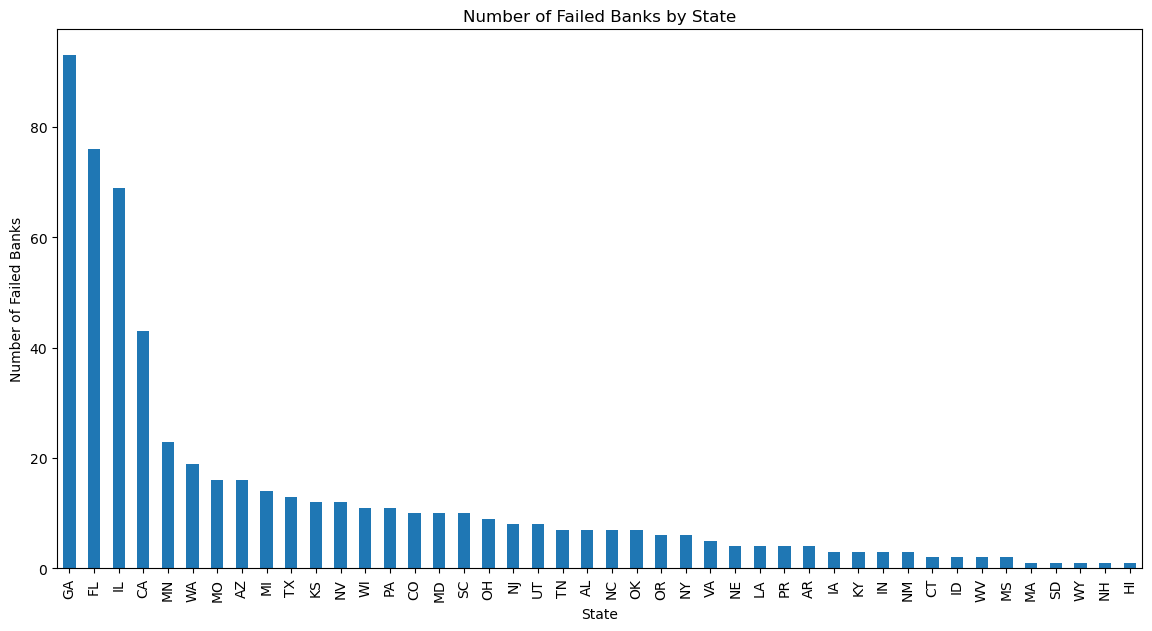

In [22]:
import matplotlib.pyplot as plt
failed_banks_by_state.plot(kind='bar', figsize=(14,7))
plt.title('Number of Failed Banks by State')
plt.xlabel('State')
plt.ylabel('Number of Failed Banks')
plt.show()

In [24]:
%%ai gpt4
Calculate which Year had the most failed banks in {df} in {In[2]} 
and visualize this in a bar chart

To calculate which year had the most failed banks, first, you need to extract the year from the 'Closing Date' column, then group the DataFrame by this new column and count the occurrences. Here's how you would do this in Python:

```python
# Convert 'Closing Date' to datetime and extract year
df['Closing Date'] = pd.to_datetime(df['Closing Date'])
df['Year'] = df['Closing Date'].dt.year

# Calculate the number of failed banks by year
failed_banks_by_year = df['Year'].value_counts()
```

In this code, `pd.to_datetime(df['Closing Date'])` converts the 'Closing Date' column to datetime type, and `df['Closing Date'].dt.year` extracts the year from each date. `df['Year'].value_counts()` then counts the number of occurrences of each unique year and returns a Series sorted by value in descending order.

To visualize the number of failed banks by year in a bar chart, you can use the matplotlib library:

```python
import matplotlib.pyplot as plt

# Plot the data
failed_banks_by_year.sort_index().plot(kind='bar', figsize=(14,7))
plt.title('Number of Failed Banks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.show()
```

In this code, `failed_banks_by_year.sort_index().plot(kind='bar', figsize=(14,7))` creates a bar plot of the Series sorted by year. `plt.title`, `plt.xlabel`, and `plt.ylabel` are used to set the title of the plot and the labels of the x and y axes, respectively. `plt.show()` is then used to display the plot.

Note: This explanation does not contain any code execution or output. It is intended to explain how to perform these operations in Python. If you want to actually execute this code and see the output, you would need to do this in a Python environment.

In [27]:
# Convert 'Closing Date' to datetime and extract year
df['Closing Date'] = pd.to_datetime(df['Closing Date'])
df['Year'] = df['Closing Date'].dt.year

# Calculate the number of failed banks by year
failed_banks_by_year = df['Year'].value_counts()
failed_banks_by_year

Year
2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2023      5
2001      4
2019      4
2020      4
2004      4
2007      3
2003      3
2000      2
2024      1
Name: count, dtype: int64

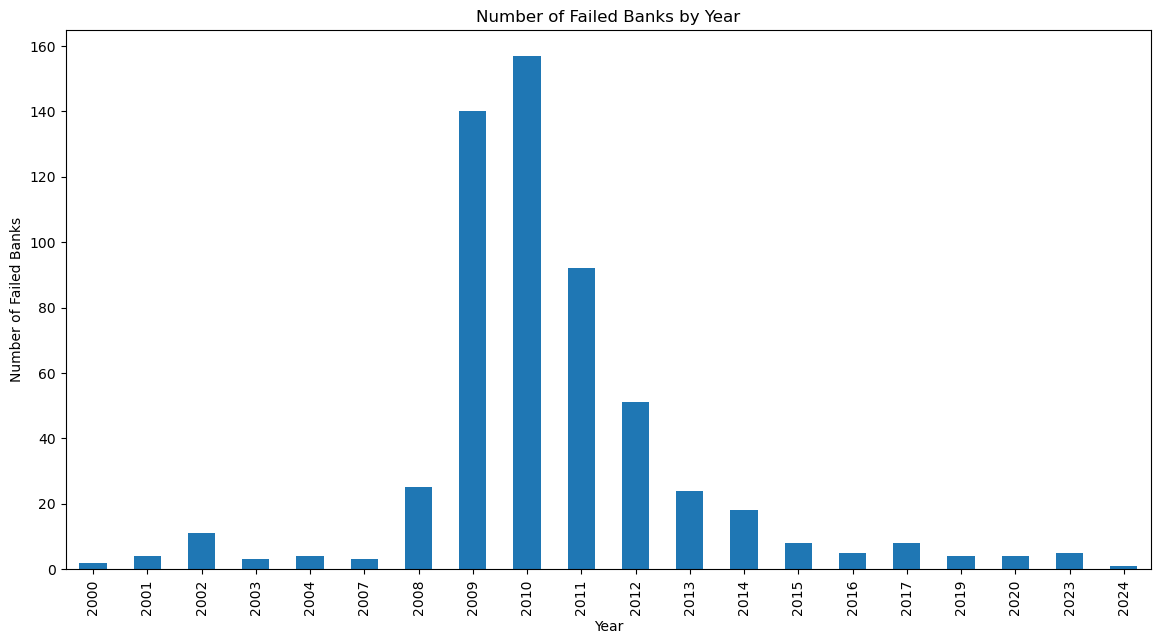

In [28]:
failed_banks_by_year.sort_index().plot(kind='bar', figsize=(14,7))
plt.title('Number of Failed Banks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.show()

In [29]:
%%ai gpt4
create a line graph showing bank failures in {df} in {In[2]}

To create a line graph showing the number of bank failures per year, you first need to process the data as described in the previous response (i.e., convert the 'Closing Date' to datetime, extract the year, and calculate the number of failed banks per year). Then, you can use the matplotlib library to create the line graph:

```python
# Convert 'Closing Date' to datetime and extract year
df['Closing Date'] = pd.to_datetime(df['Closing Date'])
df['Year'] = df['Closing Date'].dt.year

# Calculate the number of failed banks by year
failed_banks_by_year = df['Year'].value_counts()

import matplotlib.pyplot as plt

# Plot the data
failed_banks_by_year.sort_index().plot(kind='line', marker='o', figsize=(14,7))
plt.title('Number of Failed Banks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.grid(True)
plt.show()
```

In this code, `failed_banks_by_year.sort_index().plot(kind='line', marker='o', figsize=(14,7))` creates a line plot of the Series sorted by year. The `marker='o'` parameter is used to mark each data point with a circle. `plt.grid(True)` is used to add a grid to the plot for better readability. The rest of the code is the same as in the previous response and is used to set the title of the plot and the labels of the x and y axes, and to display the plot.

Note: This explanation does not contain any code execution or output. It is intended to explain how to perform these operations in Python. If you want to actually execute this code and see the output, you would need to do this in a Python environment.

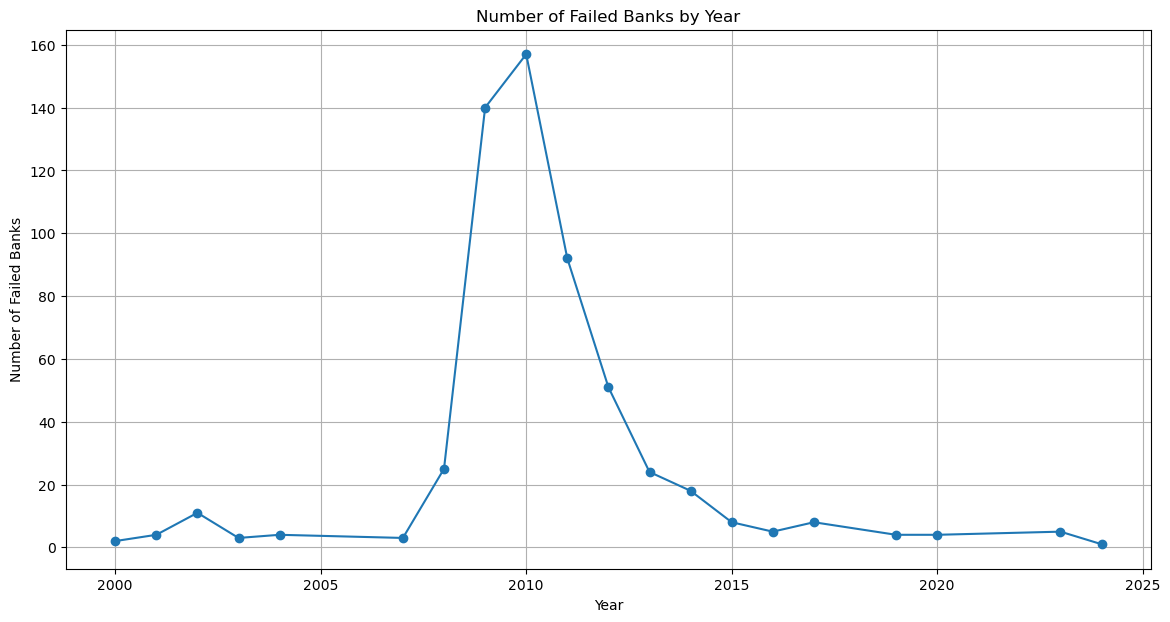

In [30]:
# Convert 'Closing Date' to datetime and extract year
df['Closing Date'] = pd.to_datetime(df['Closing Date'])
df['Year'] = df['Closing Date'].dt.year

# Calculate the number of failed banks by year
failed_banks_by_year = df['Year'].value_counts()

import matplotlib.pyplot as plt

# Plot the data
failed_banks_by_year.sort_index().plot(kind='line', marker='o', figsize=(14,7))
plt.title('Number of Failed Banks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.grid(True)
plt.show()

### AI Interpretation:  

The first graph created by ai is a bar graph that shows how many banks failed in each state in descending order. The bar chart shows that Georgia had the most bank failures since 2001.The second bar graph created by ai shows all the years included in the dataset and how many bank failures occured each year. This bar chart shows that 2010 had the most bank failures followed by 2 The third graph is a line graph that shows trends of bank failures since 2001 and makes it evident that the most banks failed bewteen 2005 and 2015.